In [32]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score

pd.set_option('max_columns',100)

#import warnings
#warnings.filterwarnings("ignore")

In [33]:
train = pd.read_csv('carsdataset.csv')
train.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [35]:
train = train.rename(columns={'MSRP': 'price'})
train = train.dropna()
train.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [36]:
#rows

train.shape[0]

8084

In [37]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train.columns.values.tolist()
for col in features:
    if train[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in train.columns:
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))

In [38]:
train.describe()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03
mean,22.039213,357.755443,2012.058634,5.878649,274.642751,5.778080,1.346858,1.683201,3.414151,40.982434,1.018308,7.509030,26.650915,19.553686,1499.397823,5.007267e+04
std,14.437040,212.102443,6.317981,1.367875,115.003475,1.886088,0.893944,1.159530,0.898087,23.106688,0.877453,5.031687,7.720473,7.159964,1413.855615,7.029313e+04
min,0.000000,0.000000,1990.000000,0.000000,55.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,9.000000,168.000000,2010.000000,5.000000,192.000000,4.000000,1.000000,0.000000,2.000000,22.000000,0.000000,3.000000,22.000000,16.000000,549.000000,2.591875e+04
50%,20.000000,351.000000,2015.000000,6.000000,264.000000,6.000000,1.000000,2.000000,4.000000,45.000000,1.000000,8.000000,26.000000,18.000000,1013.000000,3.500500e+04
75%,33.000000,550.000000,2016.000000,7.000000,320.000000,6.000000,1.000000,3.000000,4.000000,62.000000,2.000000,14.000000,30.000000,22.000000,2009.000000,4.872250e+04
max,46.000000,712.000000,2017.000000,7.000000,1001.000000,16.000000,4.000000,3.000000,4.000000,69.000000,2.000000,15.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [39]:
train_stat = train.describe(percentiles = [.05,.1, .9,.95])
train_stat

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03
mean,22.039213,357.755443,2012.058634,5.878649,274.642751,5.778080,1.346858,1.683201,3.414151,40.982434,1.018308,7.509030,26.650915,19.553686,1499.397823,5.007267e+04
std,14.437040,212.102443,6.317981,1.367875,115.003475,1.886088,0.893944,1.159530,0.898087,23.106688,0.877453,5.031687,7.720473,7.159964,1413.855615,7.029313e+04
min,0.000000,0.000000,1990.000000,0.000000,55.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
5%,3.000000,25.000000,1996.000000,4.000000,130.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,17.000000,12.000000,155.000000,2.179300e+03
10%,4.000000,67.000000,2003.000000,4.000000,150.000000,4.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,19.000000,13.000000,204.000000,1.682750e+04
50%,20.000000,351.000000,2015.000000,6.000000,264.000000,6.000000,1.000000,2.000000,4.000000,45.000000,1.000000,8.000000,26.000000,18.000000,1013.000000,3.500500e+04
90%,45.000000,643.000000,2017.000000,7.000000,430.000000,8.000000,3.000000,3.000000,4.000000,66.000000,2.000000,14.000000,34.000000,26.000000,3916.000000,8.446100e+04
95%,45.000000,675.000000,2017.000000,7.000000,520.000000,8.000000,3.000000,3.000000,4.000000,68.000000,2.000000,14.000000,38.000000,30.000000,5657.000000,1.508691e+05
max,46.000000,712.000000,2017.000000,7.000000,1001.000000,16.000000,4.000000,3.000000,4.000000,69.000000,2.000000,15.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [40]:
train_stat.loc['max',:]-train_stat.loc['95%',:]

Make                       1.0
Model                     37.0
Year                       0.0
Engine Fuel Type           0.0
Engine HP                481.0
Engine Cylinders           8.0
Transmission Type          1.0
Driven_Wheels              0.0
Number of Doors            0.0
Market Category            1.0
Vehicle Size               0.0
Vehicle Style              1.0
highway MPG              316.0
city mpg                 107.0
Popularity                 0.0
price                1915032.9
dtype: float64

In [41]:
train_stat.loc['95%',:]-train_stat.loc['90%',:]

Make                     0.0
Model                   32.0
Year                     0.0
Engine Fuel Type         0.0
Engine HP               90.0
Engine Cylinders         0.0
Transmission Type        0.0
Driven_Wheels            0.0
Number of Doors          0.0
Market Category          2.0
Vehicle Size             0.0
Vehicle Style            0.0
highway MPG              4.0
city mpg                 4.0
Popularity            1741.0
price                66408.1
dtype: float64

In [42]:
(train_stat.loc['max',:]-train_stat.loc['95%',:])/(train_stat.loc['95%',:]-train_stat.loc['90%',:])

Make                       inf
Model                 1.156250
Year                       NaN
Engine Fuel Type           NaN
Engine HP             5.344444
Engine Cylinders           inf
Transmission Type          inf
Driven_Wheels              NaN
Number of Doors            NaN
Market Category       0.500000
Vehicle Size               NaN
Vehicle Style              inf
highway MPG          79.000000
city mpg             26.750000
Popularity            0.000000
price                28.837339
dtype: float64

In [43]:
train_stat.loc['10%',:]-train_stat.loc['5%',:]

Make                     1.0
Model                   42.0
Year                     7.0
Engine Fuel Type         0.0
Engine HP               20.0
Engine Cylinders         0.0
Transmission Type        1.0
Driven_Wheels            0.0
Number of Doors          0.0
Market Category          0.0
Vehicle Size             0.0
Vehicle Style            2.0
highway MPG              2.0
city mpg                 1.0
Popularity              49.0
price                14648.2
dtype: float64

In [44]:
train_stat.loc['5%',:]-train_stat.loc['min',:]

Make                   3.0
Model                 25.0
Year                   6.0
Engine Fuel Type       4.0
Engine HP             75.0
Engine Cylinders       4.0
Transmission Type      0.0
Driven_Wheels          0.0
Number of Doors        0.0
Market Category        0.0
Vehicle Size           0.0
Vehicle Style          0.0
highway MPG            5.0
city mpg               5.0
Popularity           153.0
price                179.3
dtype: float64

In [45]:
(train_stat.loc['5%',:]-train_stat.loc['min',:])/(train_stat.loc['10%',:]-train_stat.loc['5%',:])

Make                 3.000000
Model                0.595238
Year                 0.857143
Engine Fuel Type          inf
Engine HP            3.750000
Engine Cylinders          inf
Transmission Type    0.000000
Driven_Wheels             NaN
Number of Doors           NaN
Market Category           NaN
Vehicle Size              NaN
Vehicle Style        0.000000
highway MPG          2.500000
city mpg             5.000000
Popularity           3.122449
price                0.012240
dtype: float64

In [46]:
train_stat.loc[['10%','90%','95%'],:]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price
10%,4.0,67.0,2003.0,4.0,150.0,4.0,1.0,0.0,2.0,0.0,0.0,2.0,19.0,13.0,204.0,16827.5
90%,45.0,643.0,2017.0,7.0,430.0,8.0,3.0,3.0,4.0,66.0,2.0,14.0,34.0,26.0,3916.0,84461.0
95%,45.0,675.0,2017.0,7.0,520.0,8.0,3.0,3.0,4.0,68.0,2.0,14.0,38.0,30.0,5657.0,150869.1


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
Make                 8084 non-null int64
Model                8084 non-null int64
Year                 8084 non-null int64
Engine Fuel Type     8084 non-null int64
Engine HP            8084 non-null float64
Engine Cylinders     8084 non-null float64
Transmission Type    8084 non-null int64
Driven_Wheels        8084 non-null int64
Number of Doors      8084 non-null float64
Market Category      8084 non-null int64
Vehicle Size         8084 non-null int64
Vehicle Style        8084 non-null int64
highway MPG          8084 non-null int64
city mpg             8084 non-null int64
Popularity           8084 non-null int64
price                8084 non-null int64
dtypes: float64(3), int64(13)
memory usage: 1.0 MB


In [48]:
def abnormal_filter(df, threshold_first, threshold_second):
    # Abnormal values filter for DataFrame df:
    # threshold_first (5%-min or max-95%)
    # threshold_second (second diff., times)
    df_describe = df.describe([.05, .1, .9, .95])
    cols = df_describe.columns.tolist()
    i = 0
    abnorm = 0
    for col in cols:
        i += 1
        # abnormal smallest
        P10_5 = df_describe.loc['10%',col]-df_describe.loc['5%',col]
        P_max_min = df_describe.loc['max',col]-df_describe.loc['min',col]
        if P10_5 != 0:
            if (df_describe.loc['5%',col]-df_describe.loc['min',col])/P10_5 > threshold_second:
                #abnormal smallest filter
                df = df[(df[col] >= df_describe.loc['5%',col])]
                print('1: ', i, col, df_describe.loc['min',col],df_describe.loc['5%',col],df_describe.loc['10%',col])
                abnorm += 1
        else:
            if P_max_min > 0:
                if (df_describe.loc['5%',col]-df_describe.loc['min',col])/P_max_min > threshold_first:
                    # abnormal smallest filter
                    df = df[(df[col] >= df_describe.loc['5%',col])]
                    print('2: ', i, col, df_describe.loc['min',col],df_describe.loc['5%',col],df_describe.loc['max',col])
                    abnorm += 1

        
        # abnormal biggest
        P95_90 = df_describe.loc['95%',col]-df_describe.loc['90%',col]
        if P95_90 != 0:
            if (df_describe.loc['max',col]-df_describe.loc['95%',col])/P95_90 > threshold_second:
                #abnormal biggest filter
                df = df[(df[col] <= df_describe.loc['95%',col])]
                print('3: ', i, col, df_describe.loc['90%',col],df_describe.loc['95%',col],df_describe.loc['max',col])
                abnorm += 1
        else:
            if P_max_min > 0:
                if ((df_describe.loc['max',col]-df_describe.loc['95%',col])/P_max_min > threshold_first) & (df_describe.loc['95%',col] > 0):
                    # abnormal biggest filter
                    df = df[(df[col] <= df_describe.loc['95%',col])]
                    print('4: ', i, col, df_describe.loc['min',col],df_describe.loc['95%',col],df_describe.loc['max',col])
                    abnorm += 1
    print('Number of abnormal values =', abnorm)
    return df

In [49]:
train = abnormal_filter(train, 0.5, 3)
train.info()

2:  4 Engine Fuel Type 0.0 4.0 7.0
1:  5 Engine HP 55.0 130.0 150.0
3:  5 Engine HP 430.0 520.0 1001.0
3:  13 highway MPG 34.0 38.0 354.0
1:  14 city mpg 7.0 12.0 13.0
3:  14 city mpg 26.0 30.0 137.0
1:  15 Popularity 2.0 155.0 204.0
3:  16 price 84461.0 150869.0999999999 2065902.0
Number of abnormal values = 8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6439 entries, 0 to 11912
Data columns (total 16 columns):
Make                 6439 non-null int64
Model                6439 non-null int64
Year                 6439 non-null int64
Engine Fuel Type     6439 non-null int64
Engine HP            6439 non-null float64
Engine Cylinders     6439 non-null float64
Transmission Type    6439 non-null int64
Driven_Wheels        6439 non-null int64
Number of Doors      6439 non-null float64
Market Category      6439 non-null int64
Vehicle Size         6439 non-null int64
Vehicle Style        6439 non-null int64
highway MPG          6439 non-null int64
city mpg             6439 non-null int64

In [50]:
# Add filter: train['price'] >= 1700
train = train[train['price'] >= 1700]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6439 entries, 0 to 11912
Data columns (total 16 columns):
Make                 6439 non-null int64
Model                6439 non-null int64
Year                 6439 non-null int64
Engine Fuel Type     6439 non-null int64
Engine HP            6439 non-null float64
Engine Cylinders     6439 non-null float64
Transmission Type    6439 non-null int64
Driven_Wheels        6439 non-null int64
Number of Doors      6439 non-null float64
Market Category      6439 non-null int64
Vehicle Size         6439 non-null int64
Vehicle Style        6439 non-null int64
highway MPG          6439 non-null int64
city mpg             6439 non-null int64
Popularity           6439 non-null int64
price                6439 non-null int64
dtypes: float64(3), int64(13)
memory usage: 855.2 KB


In [51]:
target = train['price']
del train['price']
feature_score = pd.DataFrame(train.columns, columns = ['feature']) 

In [52]:
# Standardization for regression model
train = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(train),
    columns=train.columns,
    index=train.index
)

In [53]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(train, target)
coeff_linreg = pd.DataFrame(train.columns.delete(0))
coeff_linreg.columns = ['feature']
coeff_linreg["score_linreg"] = pd.Series(linreg.coef_)
coeff_linreg.sort_values(by='score_linreg', ascending=False)

,feature,score_linreg
4,Engine Cylinders,80213.923282
2,Engine Fuel Type,24294.381737
3,Engine HP,4054.105533
9,Vehicle Size,3055.385735
13,Popularity,2542.578746
12,city mpg,-1013.075227
1,Year,-1437.026731
11,highway MPG,-1665.181928
8,Market Category,-2321.865452
0,Model,-3866.080336


In [54]:
coeff_linreg["score_linreg"] = coeff_linreg["score_linreg"].abs()
feature_score = pd.merge(feature_score, coeff_linreg, on='feature')
feature_score = feature_score.fillna(0)
#feature_score = feature_score.set_index('feature')
feature_score

,feature,score_linreg
0,Model,3866.080336
1,Year,1437.026731
2,Engine Fuel Type,24294.381737
3,Engine HP,4054.105533
4,Engine Cylinders,80213.923282
5,Transmission Type,9188.780750
6,Driven_Wheels,7393.099786
7,Number of Doors,5025.447232
8,Market Category,2321.865452
9,Vehicle Size,3055.385735


In [55]:
feature_score.head(20)

,feature,score_linreg
0,Model,3866.080336
1,Year,1437.026731
2,Engine Fuel Type,24294.381737
3,Engine HP,4054.105533
4,Engine Cylinders,80213.923282
5,Transmission Type,9188.780750
6,Driven_Wheels,7393.099786
7,Number of Doors,5025.447232
8,Market Category,2321.865452
9,Vehicle Size,3055.385735


In [56]:
#feature_score.to_csv('output.csv')


<BarContainer object of 14 artists>

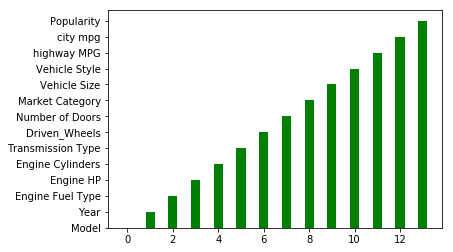

In [59]:
ax = plt.axes()
ax.bar(feature_score.index, feature_score['feature'], width=0.4, color='g')
#ax.bar(feature_score.index, feature_score['score_linreg'], width=0.4, color='r')